## Fake News Detection Using LSTM 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [25]:
fake=pd.read_csv(r'C:\Users\sanga\Desktop\fake_news_lstm\data\fake.csv')
true=pd.read_csv(r'C:\Users\sanga\Desktop\fake_news_lstm\data\real.csv')


In [26]:
fake.sample(5)

,title,text,subject,date
16305,WHAT THE HECK! Why Was Al Gore Meeting With Th...,Talk radio hosts went nuts with the news of Go...,Government News,"Dec 5, 2016"
20144,“FOLLOW THE MONEY”: Hillary Gave $125K To Hosp...,She is the only Presidential candidate who tra...,left-news,"Aug 10, 2016"
22028,Georgia Judge Suspended for Comparing Attack o...,21st Century Wire says In the wake of the Char...,US_News,"August 18, 2017"
23459,FBI Release Oregon Video Footage Depicting Dea...,21st Century Wire says..UPDATE 1-29-2016 at 01...,Middle-east,"January 29, 2016"
21837,5-Star Mooch and Free-Loading Granny Drop In F...,Nothing but the best for the queen and the que...,left-news,"Apr 20, 2015"


In [27]:
true.sample(5)

,title,text,subject,date
9330,Illinois ends spring session without a FY 2017...,"SPRINGFIELD, Ill. (Reuters) - The Democrat-con...",politicsNews,"May 31, 2016"
7795,Trump charges U.S. election results being rigg...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"October 16, 2016"
5772,"U.S. House axes rules to prevent corruption, p...",WASHINGTON (Reuters) - Two major U.S. rules ai...,politicsNews,"February 1, 2017"
3807,Trump's lawyers say tax returns show little in...,WASHINGTON (Reuters) - A review of President D...,politicsNews,"May 12, 2017"
13564,Turkey says 80 militants killed in air strike ...,ISTANBUL (Reuters) - Turkey s military said on...,worldnews,"November 29, 2017"


- Giving the fake news label 0 : 

In [28]:
fake['label']=0

In [29]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


- Giving the true news label 1:

In [31]:
true['label']=1

In [32]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


- Delete unneeded columns

In [33]:
fake.drop(columns=["title", "date", "subject"], inplace=True)
true.drop(columns=["title", "date", "subject"], inplace=True)

In [34]:
fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [35]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


- Adding the two data in the one DataFrame

In [39]:
News=pd.concat([fake, true], ignore_index=True)


In [40]:
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## Data Cleaning 

In [42]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [43]:
News.isnull().sum()

text     0
label    0
dtype: int64

In [44]:
News.duplicated().sum()

6251

In [45]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

## Class Distribution 

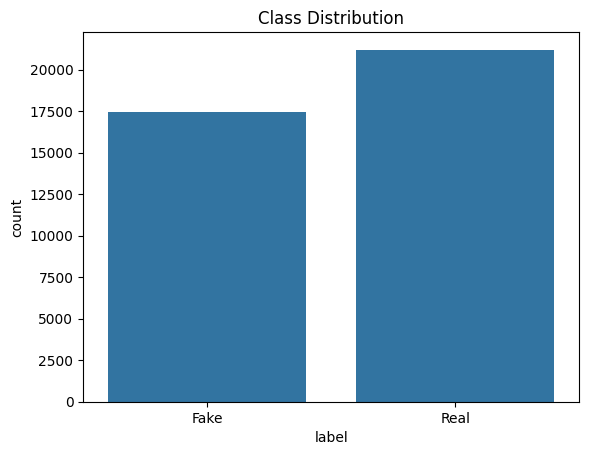

In [48]:
sns.countplot(data=News, x="label")
plt.xticks([0, 1], ["Fake", "Real"])
plt.title("Class Distribution")
plt.show()